## DONERS PREDICTION

In [1]:
## Author : Saurabh Kumar
## date : 1st-oct

In [2]:
pwd

'E:\\DataScience\\MachineLearning\\Donors Prediction'

In [3]:
path ='E:\\DataScience\\MachineLearning\\Donors Prediction'

In [4]:
import os
os.listdir()

['.ipynb_checkpoints',
 'DONERS PREDICTION.ipynb',
 'Donors Prediction.zip',
 'Predict_donor.csv',
 'Raw_Data_for_train_test.csv']

In [5]:
import pandas as pd
df = pd.read_csv(path+'/Raw_Data_for_train_test.csv')
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [6]:
df.columns[df.isnull().any()]

Index(['TARGET_D', 'DONOR_AGE', 'INCOME_GROUP', 'WEALTH_RATING',
       'MONTHS_SINCE_LAST_PROM_RESP'],
      dtype='object')

In [7]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())
            
df.columns[df.isnull().any()]

Index([], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     19372 non-null  float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    19372 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 19372 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

In [9]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # print the columns that are objectt type 
        print(label)
        df[label] = pd.Categorical(content).codes+1

URBANICITY
SES
CLUSTER_CODE
HOME_OWNER
DONOR_GENDER
OVERLAY_SOURCE
RECENCY_STATUS_96NK


In [10]:
# Cleaned data
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,13.0,5,101,87.0,0,1,5,1,1,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,3,2,41,1,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,13.0,37,113,75.0,0,4,1,4,1,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,13.0,38,92,60.0,0,6,2,35,1,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,13.0,41,101,74.0,0,3,2,45,2,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [11]:
# There's no need of Target_D column. As we are taking TARGET_B as our target variable. So we can drop this
df = df.drop('TARGET_D', axis=1)
df.head()

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,1,5,1,1,3,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,3,2,41,1,3,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,4,1,4,1,2,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,6,2,35,1,2,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,3,2,45,2,2,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [12]:
# input features
x = df.drop('TARGET_B', axis=1)

# Target variable
y = df['TARGET_B']

x.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,5,101,87.0,0,1,5,1,1,3,2.0,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,12,137,79.0,0,3,2,41,1,3,7.0,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,37,113,75.0,0,4,1,4,1,2,5.0,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,38,92,60.0,0,6,2,35,1,2,6.0,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,41,101,74.0,0,3,2,45,2,2,2.0,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [13]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: TARGET_B, dtype: int64

In [14]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# apply scaler
x = ss.fit_transform(x)
x

array([[-1.7292245 ,  0.66877603,  1.9225452 , ...,  0.59940354,
        -0.49710644,  0.37474069],
       [-1.72909912,  1.5414079 ,  1.36956114, ...,  1.39797251,
         0.21185264,  1.46005894],
       [-1.72865132,  0.95965332,  1.09306911, ...,  0.9454501 ,
         0.44286178,  2.32831353],
       ...,
       [ 1.70519674, -1.07648773,  0.05622399, ..., -1.2373051 ,
         0.24371597, -1.14470485],
       [ 1.70571618,  1.34748971,  1.30043813, ...,  1.58430527,
         0.622662  ,  1.24299529],
       [ 1.70578783, -1.07648773,  0.74745407, ..., -1.21068613,
         1.38169203, -0.9276412 ]])

Modelling 
We'll use following models and then evaluate them to find which model works well:

1.KNN
2.Random Forest
3.XGBoost Classifier

In [15]:
##KNN
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# define and configure the model
model = KNeighborsClassifier()

# fit the model
model.fit(xtrain, ytrain)

# evaluate the model
preds = model.predict(xtest)
accuracy_score(ytest, preds)

0.7029677419354838

In [16]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(xtrain, ytrain)

# evaluate the model
preds = model.predict(xtest)
accuracy_score(ytest, preds)

0.7455483870967742

In [17]:
## XGBOOST
from xgboost import XGBClassifier

# define and configure the model
model = XGBClassifier()

# fit the model
model.fit(xtrain, ytrain)

# evaluate the model
preds = model.predict(xtest)
accuracy_score(ytest, preds)

C:\Users\Saurabh Kumar\.conda\envs\tfod\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7329032258064516

## We can see Random forest perfomed best. So let's perform hyperperameter tuning for Random forest

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# different randomforestregressor hyperperameters
rf_grid = {'n_estimators' : np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
            'max_features' : [0.5, 1, 'sqrt', 'auto']}

# instentiate randomizedsearchcv model
rs_model= RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, 
                                                  random_state=42),
                                                  param_distributions = rf_grid,
                                                  n_iter = 90,
                                                  cv=5,
                                                  verbose=True)

rs_model.fit(xtrain, ytrain)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [19]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

### We got the best parameters for our model. Now Let's create an ideal model that have these as it's parameters.

In [20]:
ideal_model = RandomForestClassifier(n_estimators= 80,
                                     min_samples_split = 2,
                                     min_samples_leaf = 5,
                                     max_features = 'auto',
                                     max_depth = 10)

# fit the model
ideal_model.fit(xtrain, ytrain)

# evaluate the model
preds = ideal_model.predict(xtest)
accuracy_score(ytest, preds)

0.7465806451612903

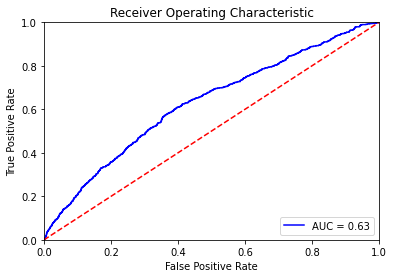

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = ideal_model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Now since we have a good model to predict. Let's Predict wheather a person donates or not for our Test data


In [22]:
test_df = pd.read_csv(path+'/Predict_donor.csv')
test_df.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,2,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [23]:
# Fill numeric rows with the median
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            test_df[label] = content.fillna(content.median())

In [24]:
# Turn categorical variables into numbers
for label, content in test_df.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # print the columns that are object type 
        print(label)
        test_df[label] = pd.Categorical(content).codes+1

URBANICITY
SES
CLUSTER_CODE
HOME_OWNER
DONOR_GENDER
OVERLAY_SOURCE
RECENCY_STATUS_96NK


In [25]:
Target = ideal_model.predict(test_df)
Target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
PREDICTED_df = pd.DataFrame()
PREDICTED_df['TARGET_B'] = Target
PREDICTED_df['CONTROL_NUMBER'] = test_df['CONTROL_NUMBER']
PREDICTED_df.head()

,TARGET_B,CONTROL_NUMBER
0,0,139
1,0,142
2,0,282
3,0,368
4,0,387
